In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)

In [2]:
adnimerge = pd.read_csv("ADNIMERGE.csv")
adnimerge = adnimerge[(adnimerge.COLPROT=="ADNI2")&(adnimerge.ORIGPROT=="ADNI2")]

cols_effective_biomarker = ['RID', 'ABETA', 'TAU', 'PTAU']
CSF_biomarker = pd.read_csv("UPENN_CSF Biomarkers_baseline_May15.2014.csv")
CSF_biomarker = CSF_biomarker[cols_effective_biomarker]
CSF_biomarker = CSF_biomarker.rename(columns=lambda s:'CSF_'+s)

adnimerge = adnimerge.merge(CSF_biomarker, how='left', left_on='RID', right_on='CSF_RID')

print(adnimerge.shape)
adnimerge.head()

(4717, 98)


,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp,CSF_RID,CSF_ABETA,CSF_TAU,CSF_PTAU
0,5282,082_S_5282,bl,82,ADNI2,ADNI2,09/09/13,SMC,66.9,Male,...,1.326790,0.000000,0.00000,0,0,20:00.0,NaN,NaN,NaN,NaN
1,5280,100_S_5280,m24,100,ADNI2,ADNI2,29/09/15,SMC,67.5,Male,...,0.983143,2.031490,24.32790,24,24,20:00.0,NaN,NaN,NaN,NaN
2,5280,100_S_5280,m06,100,ADNI2,ADNI2,06/03/14,SMC,67.5,Male,...,0.983143,0.465435,5.57377,6,6,20:00.0,NaN,NaN,NaN,NaN
3,5280,100_S_5280,bl,100,ADNI2,ADNI2,17/09/13,SMC,67.5,Male,...,0.983143,0.000000,0.00000,0,0,20:00.0,NaN,NaN,NaN,NaN
4,5279,082_S_5279,bl,82,ADNI2,ADNI2,23/10/13,SMC,68.5,Male,...,0.985156,0.000000,0.00000,0,0,20:00.0,NaN,NaN,NaN,NaN


In [3]:
num_all = np.sum(adnimerge['VISCODE']=='bl')
num_CN = np.sum((adnimerge['DX_bl']=='CN')&(adnimerge['VISCODE']=='bl'))
num_AD = np.sum((adnimerge['DX_bl']=='AD')&(adnimerge['VISCODE']=='bl'))
num_other = num_all - num_CN - num_AD

print('total:', num_all)
print('CN    patients:', num_CN)
print('AD    patients:', num_AD)
print('other patients:', num_other)

total: 789
CN    patients: 188
AD    patients: 150
other patients: 451


In [4]:
cols_of_interests = ['RID', 'DX_bl', 
                     'AGE', 'PTGENDER', 'PTEDUCAT', 
                     'PTETHCAT', 'PTRACCAT', 'PTMARRY', 
                     'APOE4', 'FDG', 'AV45', 
                     'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 
                     'RAVLT_immediate', 'RAVLT_learning', 
                     'RAVLT_forgetting', 'RAVLT_perc_forgetting', 
                     'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 
                     'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 
                     'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 
                     'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 
                     'EcogSPDivatt', 'EcogSPTotal', 'FAQ', 
                     'Ventricles', 'Hippocampus', 'WholeBrain', 
                     'Entorhinal', 'Fusiform', 'MidTemp', 
                     'ICV', 'DX', 'Month_bl', 'Month']
cols_bl = ['CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl', 'RAVLT_immediate_bl',
           'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 
           'FAQ_bl', 'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
           'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'FDG_bl','PIB_bl', 'AV45_bl', 
           'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl', 
           'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 
           'EcogPtTotal_bl', 'EcogSPMem_bl', 'EcogSPLang_bl',                    
           'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSPOrgan_bl', 
           'EcogSPDivatt_bl', 'EcogSPTotal_bl']

adnimerge_clean = adnimerge[cols_of_interests].copy()
print(adnimerge_clean.shape)
adnimerge_clean.head()

(4717, 45)


,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,...,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,Month_bl,Month
0,5282,SMC,66.9,Male,17,Not Hisp/Latino,White,Married,1.0,1.13549,...,NaN,7851.0,NaN,NaN,NaN,NaN,1498720.0,CN,0.00000,0
1,5280,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN,24.32790,24
2,5280,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN,5.57377,6
3,5280,SMC,67.5,Male,16,Not Hisp/Latino,Black,Never married,0.0,1.25195,...,33185.0,8297.0,1165500.0,4946.0,20147.0,21194.0,1656460.0,CN,0.00000,0
4,5279,SMC,68.5,Male,20,Not Hisp/Latino,White,Married,0.0,1.50629,...,21327.0,7654.0,1081140.0,4065.0,17964.0,18611.0,1508210.0,CN,0.00000,0


In [5]:
adnimerge_clean['DX_bl'] = adnimerge_clean['DX_bl'].map({'CN':0,'AD':2,'EMCI':1,'LMCI':1,'SMC':1})
adnimerge_clean['PTGENDER'] = adnimerge_clean['PTGENDER'].map({'Female':0,'Male':1})
adnimerge_clean = pd.get_dummies(adnimerge_clean, columns=['PTRACCAT'], drop_first=True)
adnimerge_clean = adnimerge_clean[adnimerge_clean.PTETHCAT!='Unknown']
adnimerge_clean = adnimerge_clean[adnimerge_clean.PTMARRY!='Unknown']
adnimerge_clean = pd.get_dummies(adnimerge_clean, columns=['PTMARRY'], drop_first=True)

col_names_replaced = [col.replace(' ', '_') for col in adnimerge_clean.columns]
adnimerge_clean.rename(columns=dict(zip(adnimerge_clean.columns, col_names_replaced)), inplace=True)

print(adnimerge_clean.shape)
adnimerge_clean.head()

(4681, 52)


,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,APOE4,FDG,AV45,CDRSB,...,Month,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other_PI,PTRACCAT_More_than_one,PTRACCAT_Unknown,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never_married,PTMARRY_Widowed
0,5282,1,66.9,1,17,Not Hisp/Latino,1.0,1.13549,1.326790,0.0,...,0,0,0,0,0,0,1,1,0,0
1,5280,1,67.5,1,16,Not Hisp/Latino,0.0,NaN,0.982566,0.0,...,24,0,1,0,0,0,0,0,1,0
2,5280,1,67.5,1,16,Not Hisp/Latino,0.0,NaN,NaN,0.0,...,6,0,1,0,0,0,0,0,1,0
3,5280,1,67.5,1,16,Not Hisp/Latino,0.0,1.25195,0.983143,0.0,...,0,0,1,0,0,0,0,0,1,0
4,5279,1,68.5,1,20,Not Hisp/Latino,0.0,1.50629,0.985156,0.0,...,0,0,0,0,0,0,1,1,0,0


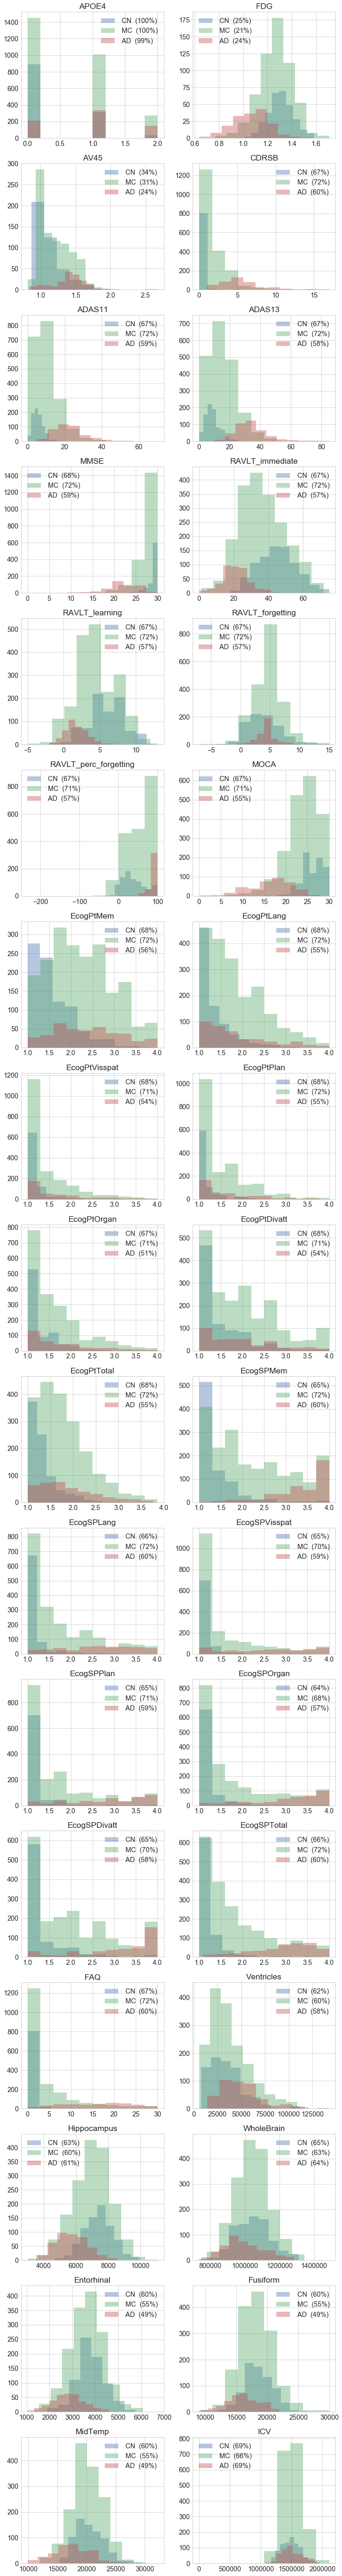

In [8]:
cols_continuous = [
    'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE',
    'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
    'RAVLT_perc_forgetting', 'MOCA', 'EcogPtMem', 'EcogPtLang',
    'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
    'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
    'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FAQ', 'Ventricles',
    'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV']

num_continuous = len(cols_continuous)

adnimerge_clean_CN = adnimerge_clean[adnimerge_clean['DX_bl']==0]
adnimerge_clean_MC = adnimerge_clean[adnimerge_clean['DX_bl']==1]
adnimerge_clean_AD = adnimerge_clean[adnimerge_clean['DX_bl']==2]

fig, ax = plt.subplots(num_continuous//2, 2, figsize=(12,100))
for i,col_name in enumerate(cols_continuous):
    mis_rate_CN = np.mean(adnimerge_clean_CN[col_name].isnull())
    mis_rate_MC = np.mean(adnimerge_clean_MC[col_name].isnull())
    mis_rate_AD = np.mean(adnimerge_clean_AD[col_name].isnull())
    adnimerge_clean_CN[col_name].hist(
        ax=ax[i//2, i%2], alpha=0.4, 
        label='{:^4} ({:0.0f}%)'.format('CN', 100*(1-mis_rate_CN)))
    adnimerge_clean_MC[col_name].hist(
        ax=ax[i//2, i%2], alpha=0.4, 
        label='{:^4} ({:0.0f}%)'.format('MC', 100*(1-mis_rate_MC)))
    adnimerge_clean_AD[col_name].hist(
        ax=ax[i//2, i%2], alpha=0.4, 
        label='{:^4} ({:0.0f}%)'.format('AD', 100*(1-mis_rate_AD)))
    ax[i//2, i%2].set_title(col_name)
    ax[i//2, i%2].legend(loc='best')

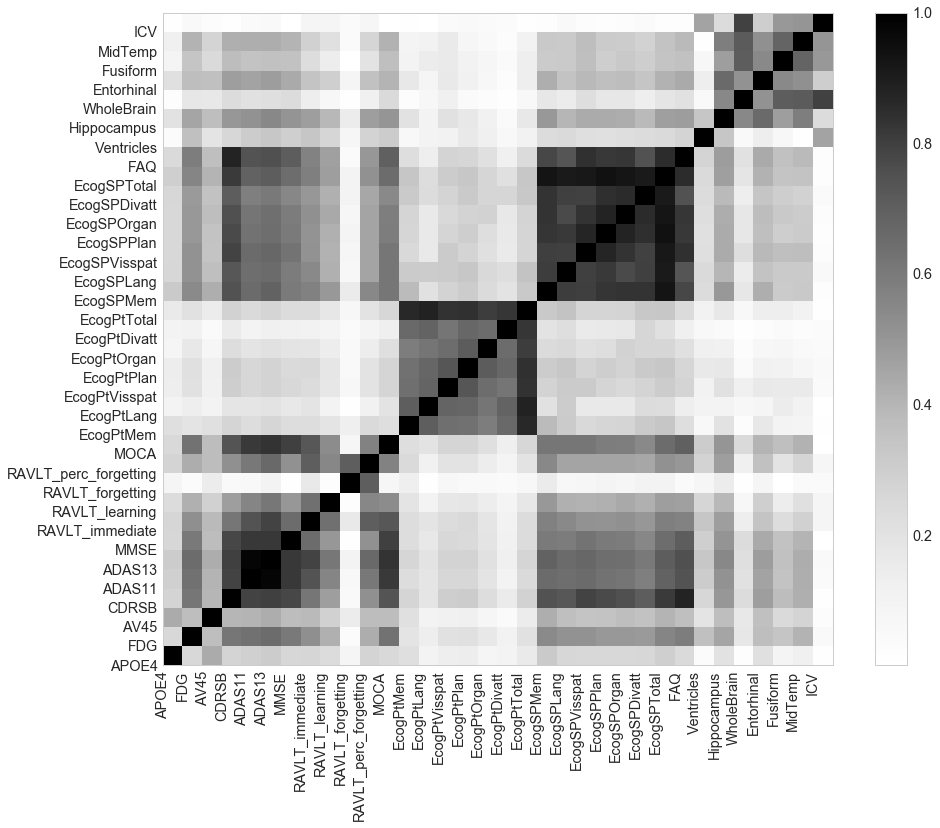

In [9]:
def plot_correlation_heatmap(df, ax):
    df_copy = df.copy()
    N = df.shape[1]
    corr_matrix = np.zeros((N, N))
    for i,icol in enumerate(df.columns):
        for j,jcol in enumerate(df.columns):
            idx_available = np.where(
                (~df[icol].isnull()) & (~df[jcol].isnull()))
            ival = df[icol].values[idx_available]
            jval = df[jcol].values[idx_available]
            cov = np.mean(ival*jval) - np.mean(ival)*np.mean(jval)
            corr = cov / np.std(ival) / np.std(jval)
            corr_matrix[i,j] = corr
            
    ax.set_xticks(ticks=range(len(df.columns)))
    ax.set_yticks(ticks=range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation='vertical')
    ax.set_yticklabels(df.columns)
    plot = ax.pcolor(np.abs(corr_matrix))
    return plot

fig, ax = plt.subplots(figsize=(15,12))
plot = plot_correlation_heatmap(adnimerge_clean[cols_continuous], ax)
fig.colorbar(plot)

In [ ]:
# def imputation_mean(df, cols):
#     df_copy = df.copy()
#     for c in cols:
#         c_mean = np.mean(df[c])
#         df_copy[c] = df[c].map(lambda x:c_mean if np.isnan(x) else x)
#     return df_copy

# adnimerge_imputed = imputation_mean(adnimerge_clean, cols_continuous)
# print(adnimerge_imputed.shape)
# adnimerge_imputed.head()